In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import os
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
import re

In [2]:
df = pd.read_csv('movie information.csv')

Get an overview of your data

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         6593 non-null   object
 1   IMDB         6593 non-null   object
 2   RT           1817 non-null   object
 3   language     6584 non-null   object
 4   stars        6587 non-null   object
 5   director     6336 non-null   object
 6   genres       6542 non-null   object
 7   description  6593 non-null   object
dtypes: object(8)
memory usage: 412.2+ KB


,name,IMDB,RT,language,stars,director,genres,description
count,6593,6593,1817,6584,6587,6336,6542,6593
unique,5170,74,92,593,4935,2950,379,5142
top,Leo 2023,7.1/10,100/100,English,"Miya Muqi, Feng-bin Mou, Zhenzhen Cui",–,درام,روبان سفید، فیلمی آلمانی درام به کارگردانی فیل...
freq,4,284,132,4144,5,34,624,3


In [4]:
df.head()

,name,IMDB,RT,language,stars,director,genres,description
0,Your Lucky Day 2023,5.8/10,86/100,English,"Angus Cloud, Elliot Knight, Jessica Garza",Dan Brown,هیجان انگیز,روز شانس تو؛ فیلمی مهیج به کارگردانی دن براون ...
1,The Persian Version 2023,6.8/10,82/100,"English, Persian","Layla Mohammadi, Niousha Noor, Kamand Shafieis...",Maryam Keshavarz,درام کمدی,نسخه ایرانی؛ فیلمی کمدی درام به کارگردانی مریم...
2,Theres Something in the Barn 2023,5.6/10,78/100,English,"Amrita Acharia, Townes Bunner, Claire Dore",Magnus Martens,ترسناک فانتزی کمدی,چیزی در اصطبل؛ فیلمی فانتزی ترسناک کمدی به کار...
3,The Bad Guys A Very Bad Holiday 2023,5.2/10,30/100,English,"Kari Wahlgren, Chris Diamantopoulos, Keith Sil...",Bret Haaland,اکشن ماجراجویی,رفقای بد تعطیلات خیلی بد؛ انیمیشنی کوتاه کمدی ...
4,Genie 2023,5.9/10,31/100,English,"Melissa McCarthy, Paapa Essiedu, Denée Benton",Sam Boyd,فانتزی کمدی,جنی یا غول چراغ جادو؛ فیلمی کمدی فانتزی به کار...


# preprocess

In [5]:
# Drop duplicate columns
df = df.T.drop_duplicates().T

# Drop duplicate rows
df = df.drop_duplicates(keep='first')

# Missing values
# Check for missing values
df.isnull().sum()
# Option 1: Drop missing values
df.dropna(inplace=True)
# Option 2: Fill missing values
#df = df.fillna(df.median())

# Use describe() method to get summary statistics
print(df.describe())

         name    IMDB       RT language  \
count    1017    1017     1017     1017   
unique    971      63       92       98   
top     Pluto  7.1/10  100/100  English   
freq        2      50       73      685   

                                        stars    director genres  \
count                                    1017        1017   1017   
unique                                    966         908    178   
top     Miya Muqi, Feng-bin Mou, Zhenzhen Cui  Binjie Liu   درام   
freq                                        3           4    122   

                                              description  
count                                                1017  
unique                                                970  
top     وینی خرسه خون و عسل؛ فیلمی مستقل اسلشر به نویس...  
freq                                                    2  


In [6]:
# Removing '/10' from the 'IMDB' column
df['IMDB'] = df['IMDB'].str.replace('/10', '')
df['IMDB'] = df['IMDB'].astype(float)
# Removing '/100' from the 'RT' column
df['RT'] = df['RT'].str.replace('/100', '')
df['RT'] = df['RT'].astype(float)

In [7]:
# Remove spaces from the stars column
df.stars = df.stars.str.replace(' ', '')

# Create one-hot encoded columns for each star
#stars_cols = df.stars.str.get_dummies(sep=',')
# Join the one-hot encoded columns back to the original DataFrame
#df = df.join(stars_cols, how='outer')

In [8]:
#label encoding
# create a label encoder object
le = LabelEncoder()
# Fit and transform the data
df['stars'] = le.fit_transform(df['stars'])
df['director'] = le.fit_transform(df['director'])

# Linear Regression - IMDB

In [9]:
# split the dataset into training and testing sets
X = df.drop(columns=['name','IMDB','RT', 'language', 'genres','description'])
y = df['IMDB'].values

In [10]:
#from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
#from sklearn.linear_model import LinearRegression

# create a Regression model & train the model on the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing set using the trained model
predictions = regressor.predict(X_test)

predictions[3]

6.442011816186047

In [12]:
#from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.9239871990953022
Mean Squared Error: 1.2476884019173866
Root Mean Squared Error: 1.1169997322816987


# Decision-Tree - RT rate

In [13]:
# split the dataset into training and testing sets
x = df.drop(columns=['name','IMDB','RT', 'language', 'genres', 'description'])
Y = df['RT'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.34, random_state=0)

# create a decision tree classifier model & train the model on the training set
clf = DecisionTreeClassifier().fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

y_pred[3]

89.0

In [14]:
# Calculate the accuracy
accuracy = (y_pred == y_test).sum() / len(y_test)

print(f'Accuracy: {accuracy:.3f}')
print("Accuracy:", accuracy * 100, "%")

Accuracy: 0.040
Accuracy: 4.046242774566474 %


In [15]:
#from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 26.569364161849713
Mean Squared Error: 1324.5982658959538
Root Mean Squared Error: 36.39503078575362


# Naive Bayes - genres prediction

In [16]:
# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)  # Remove non-alphanumeric characters
    text = text.lower()  # Lowercase
    text = text.strip()  # Remove leading/trailing whitespace
    tokens = nltk.word_tokenize(text)  # Tokenize
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop_words]  # Remove stop words
    return ' '.join(tokens)

In [17]:
# Apply preprocessing to the dataset
df['cleaned_description'] = df['description'].apply(preprocess_text)

In [18]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_description'])
y = df['genres']

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training using Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)

y_pred[3]

'درام'

In [20]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.09313725490196079
Classification Report:
                                precision    recall  f1-score   support

                         اکشن       0.00      0.00      0.00         1
          اکشن بیوگرافی جنایی       0.00      0.00      0.00         1
             اکشن تاریخی درام       0.00      0.00      0.00         2
             اکشن ترسناک درام       0.00      0.00      0.00         1
              اکشن جنایی درام       0.00      0.00      0.00         3
       اکشن جنایی هیجان انگیز       0.00      0.00      0.00         4
               اکشن جنگی درام       0.00      0.00      0.00         2
                    اکشن درام       0.00      0.00      0.00         2
             اکشن درام فانتزی       0.00      0.00      0.00         1
          اکشن درام ماجراجویی       0.00      0.00      0.00         7
    اکشن درام ماجراجویی ورزشی       0.00      0.00      0.00         1
        اکشن درام هیجان انگیز       0.00      0.00      0.00         1
               اکشن در

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# 3-fold validation

Naive Bayes

In [21]:
# Prepare data for manual cross-validation
X = df['cleaned_description']
y = df['genres']

# Convert X and y to numpy arrays for easier indexing
X = np.array(X)
y = np.array(y)

# Function to split data into k folds
def split_k_folds(X, y, k=3):
    fold_size = len(X) // k
    folds = []
    for i in range(k):
        X_fold = X[i * fold_size:(i + 1) * fold_size]
        y_fold = y[i * fold_size:(i + 1) * fold_size]
        folds.append((X_fold, y_fold))
    return folds

# Split the data into 3 folds
folds = split_k_folds(X, y, k=3)

# List to store accuracy for each fold
accuracies = []

# 3-Fold Cross-Validation
for i in range(3):
    # Prepare training and validation data
    X_train = np.concatenate([folds[j][0] for j in range(3) if j != i])
    y_train = np.concatenate([folds[j][1] for j in range(3) if j != i])
    X_val = folds[i][0]
    y_val = folds[i][1]

    # Vectorize text data using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_val_tfidf = vectorizer.transform(X_val)

    # Train the model
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)
    print(f'Fold {i + 1} Accuracy: {accuracy}')
    print(f'Fold {i + 1} Classification Report:\n{classification_report(y_val, y_pred)}')

# Calculate and print mean accuracy and standard deviation
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Standard Deviation of Accuracy: {std_accuracy}')

Fold 1 Accuracy: 0.11209439528023599
Fold 1 Classification Report:
                                  precision    recall  f1-score   support

                            اکشن       0.00      0.00      0.00         2
             اکشن بیوگرافی جنایی       0.00      0.00      0.00         2
         اکشن بیوگرافی ماجراجویی       0.00      0.00      0.00         1
                اکشن تاریخی درام       0.00      0.00      0.00         3
              اکشن ترسناک فانتزی       0.00      0.00      0.00         1
           اکشن ترسناک ماجراجویی       0.00      0.00      0.00         1
         اکشن ترسناک هیجان انگیز       0.00      0.00      0.00         1
                اکشن ترسناک کمدی       0.00      0.00      0.00         1
                      اکشن جنایی       0.00      0.00      0.00         2
                 اکشن جنایی درام       0.00      0.00      0.00         3
اکشن جنایی ماجراجویی هیجان انگیز       0.00      0.00      0.00         1
          اکشن جنایی هیجان انگیز       0.00 

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# 5-fold validation

Naive Bayes

In [22]:
# Prepare data for manual cross-validation
X = df['cleaned_description']
y = df['genres']

# Convert X and y to numpy arrays for easier indexing
X = np.array(X)
y = np.array(y)

# Function to split data into k folds
def split_k_folds(X, y, k=5):
    fold_size = len(X) // k
    folds = []
    for i in range(k):
        X_fold = X[i * fold_size:(i + 1) * fold_size]
        y_fold = y[i * fold_size:(i + 1) * fold_size]
        folds.append((X_fold, y_fold))
    return folds

# Split the data into 5 folds
folds = split_k_folds(X, y, k=5)

# List to store accuracy for each fold
accuracies = []

# 3-Fold Cross-Validation
for i in range(5):
    # Prepare training and validation data
    X_train = np.concatenate([folds[j][0] for j in range(5) if j != i])
    y_train = np.concatenate([folds[j][1] for j in range(5) if j != i])
    X_val = folds[i][0]
    y_val = folds[i][1]

    # Vectorize text data using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_val_tfidf = vectorizer.transform(X_val)

    # Train the model
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)
    print(f'Fold {i + 1} Accuracy: {accuracy}')
    print(f'Fold {i + 1} Classification Report:\n{classification_report(y_val, y_pred)}')

# Calculate and print mean accuracy and standard deviation
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Standard Deviation of Accuracy: {std_accuracy}')

Fold 1 Accuracy: 0.09852216748768473
Fold 1 Classification Report:
                               precision    recall  f1-score   support

                         اکشن       0.00      0.00      0.00         2
          اکشن بیوگرافی جنایی       0.00      0.00      0.00         1
      اکشن بیوگرافی ماجراجویی       0.00      0.00      0.00         1
             اکشن تاریخی درام       0.00      0.00      0.00         3
           اکشن ترسناک فانتزی       0.00      0.00      0.00         1
        اکشن ترسناک ماجراجویی       0.00      0.00      0.00         1
      اکشن ترسناک هیجان انگیز       0.00      0.00      0.00         1
                   اکشن جنایی       0.00      0.00      0.00         2
              اکشن جنایی درام       0.00      0.00      0.00         2
       اکشن جنایی هیجان انگیز       0.00      0.00      0.00         3
              اکشن جنایی کمدی       0.00      0.00      0.00         2
                    اکشن جنگی       0.00      0.00      0.00         1
        ا

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Fold 3 Accuracy: 0.12807881773399016
Fold 3 Classification Report:
                               precision    recall  f1-score   support

                         اکشن       0.00      0.00      0.00         1
             اکشن تاریخی درام       0.00      0.00      0.00         1
           اکشن ترسناک معمایی       0.00      0.00      0.00         1
                   اکشن جنایی       0.00      0.00      0.00         1
              اکشن جنایی درام       0.00      0.00      0.00         5
       اکشن جنایی هیجان انگیز       0.00      0.00      0.00         8
               اکشن جنگی درام       0.00      0.00      0.00         2
           اکشن خانوادگی کمدی       0.00      0.00      0.00         1
                    اکشن درام       0.00      0.00      0.00         2
          اکشن درام ماجراجویی       0.00      0.00      0.00         8
        اکشن درام هیجان انگیز       0.00      0.00      0.00         3
  اکشن علمی تخیلی هیجان انگیز       0.00      0.00      0.00         1
        ا

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Fold 4 Classification Report:
                                      precision    recall  f1-score   support

               اکشن تاریخی ماجراجویی       0.00      0.00      0.00         1
                   اکشن ترسناک جنایی       0.00      0.00      0.00         1
                     اکشن جنایی درام       0.00      0.00      0.00         2
                اکشن جنایی ماجراجویی       0.00      0.00      0.00         1
              اکشن جنایی هیجان انگیز       0.00      0.00      0.00         3
                      اکشن جنگی درام       0.00      0.00      0.00         1
                           اکشن درام       0.00      0.00      0.00         1
    اکشن درام علمی تخیلی هیجان انگیز       0.00      0.00      0.00         1
                    اکشن درام فانتزی       0.00      0.00      0.00         2
          اکشن درام فانتزی ماجراجویی       0.00      0.00      0.00         2
                 اکشن درام ماجراجویی       0.00      0.00      0.00         5
                    اکشن درام معم

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Bar chart - displays the 10 most popular genres based on the IMDB rate and date

In [23]:
# extract the date from the names of the movies
# Define a Function to Extract Numbers
def extract_numbers(s):
    numbers = re.findall(r'\d+', s)
    return ''.join(numbers) if numbers else np.nan

# Apply the function to create a new column with extracted numbers
df['Date'] = df['name'].apply(extract_numbers)

# Convert the extracted numbers to floats (or integers if appropriate)
# Here, we use floats to handle NaN values
df['Date'] = df['Date'].astype(float)

# Replacing values in column 'Date' less than 1950 with NaN
df['Date'] = df['Date'].apply(lambda x: np.nan if x < 1950 else x)

df['Date']

0        2023.0
1        2023.0
2        2023.0
3        2023.0
4        2023.0
         ...   
3788     2022.0
3790     2022.0
3792    32022.0
3793     2022.0
4642     2020.0
Name: Date, Length: 1017, dtype: float64

In [24]:
# Split the genres and expand the dataframe so each genre has its own row
df_genres = df.assign(genres=df['genres'].str.split(',')).explode('genres')

# Strip any extra whitespace from genre names
df_genres['genres'] = df_genres['genres'].str.strip()

# Display the first few rows to verify the data
df_genres.head()

,name,IMDB,RT,language,stars,director,genres,description,cleaned_description,Date
0,Your Lucky Day 2023,5.8,86.0,English,64,182,هیجان انگیز,روز شانس تو؛ فیلمی مهیج به کارگردانی دن براون ...,,2023.0
1,The Persian Version 2023,6.8,82.0,"English, Persian",528,559,درام کمدی,نسخه ایرانی؛ فیلمی کمدی درام به کارگردانی مریم...,زندگی « واقعی » خود را از زندگی خانوادگی‌اش جد...,2023.0
2,Theres Something in the Barn 2023,5.6,78.0,English,56,534,ترسناک فانتزی کمدی,چیزی در اصطبل؛ فیلمی فانتزی ترسناک کمدی به کار...,,2023.0
3,The Bad Guys A Very Bad Holiday 2023,5.2,30.0,English,475,111,اکشن ماجراجویی,رفقای بد تعطیلات خیلی بد؛ انیمیشنی کوتاه کمدی ...,,2023.0
4,Genie 2023,5.9,31.0,English,629,746,فانتزی کمدی,جنی یا غول چراغ جادو؛ فیلمی کمدی فانتزی به کار...,ود را به دست آورد…,2023.0


In [25]:
# Calculate average rating for each genre
average_genre_rating = df_genres.groupby('genres')['IMDB'].mean().reset_index()

# Sort by rating and get the top 10 genres
top_genres = average_genre_rating.sort_values(by='IMDB', ascending=False).head(10)['genres']

# Filter the original dataframe to include only the top 10 genres
df_top_genres = df_genres[df_genres['genres'].isin(top_genres)]

# Calculate average rating for each top genre per year
genre_year_rating = df_top_genres.groupby(['genres', 'Date'])['IMDB'].mean().reset_index()

# Display the prepared data
print("\nTop 10 Genres with Yearly Ratings:")
genre_year_rating


Top 10 Genres with Yearly Ratings:


,genres,Date,IMDB
0,اکشن درام معمایی,2003.0,8.4
1,بیوگرافی ورزشی,2023.0,8.4
2,درام ماجراجویی,2022.0,7.1
3,درام کمدی هیجان انگیز,2023.0,7.4


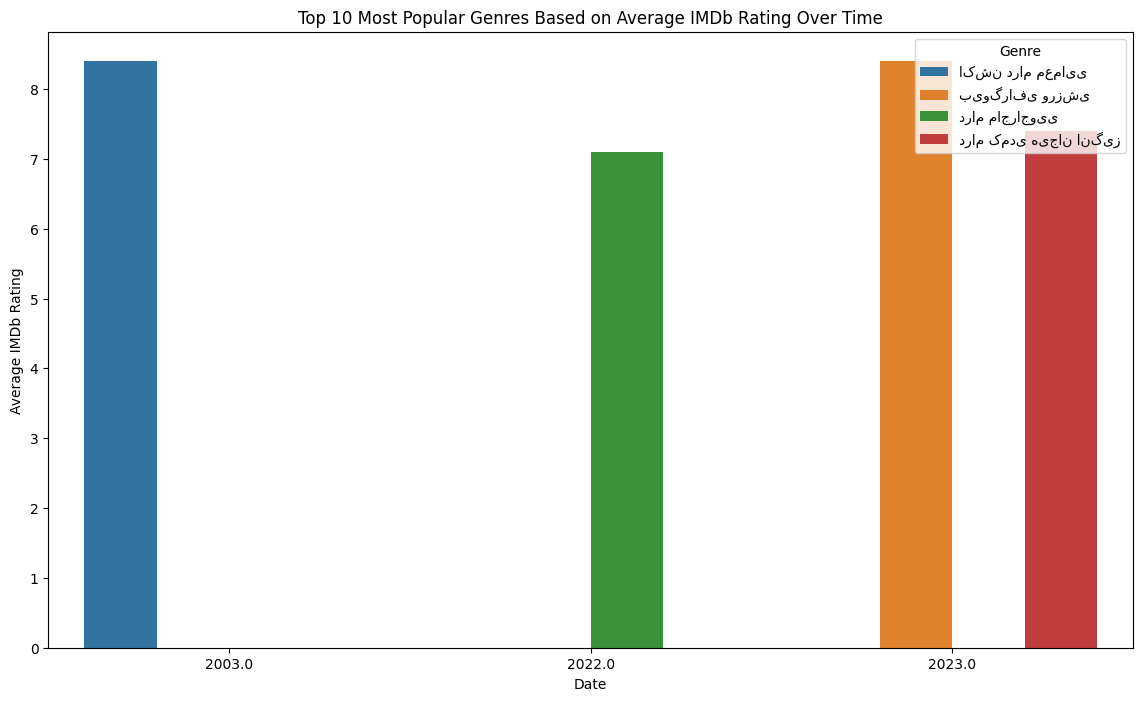

In [26]:
# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_year_rating, x='Date', y='IMDB', hue='genres')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average IMDb Rating')
plt.title('Top 10 Most Popular Genres Based on Average IMDb Rating Over Time')
plt.legend(title='Genre')
plt.show()